In [15]:
import pyautogui

x = []
while True:
  if(len(x)==2):
    break
  val = input()
  if(val != ""):
    break
  else:
    im = x.append(pyautogui.position())
print(x)
#test screen shot
i = pyautogui.screenshot(region=(x[0].x, x[0].y, x[1].x-x[0].x,x[1].y-x[0].y))


[Point(x=2086, y=618), Point(x=2578, y=668)]


In [16]:
# Import required packages
import cv2
import numpy as np
import pytesseract
 
# Mention the installed location of Tesseract-OCR in your system
# pytesseract.pytesseract.tesseract_cmd = 'System_path_to_tesseract.exe'
 
# Read image from which text needs to be extracted
 
# Preprocessing the image starts
img = cv2.cvtColor(np.array(i), cv2.COLOR_RGB2BGR)

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
 
# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
 
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
 
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)
 
# Creating a copy of image
im2 = img.copy()
 
# A text file is created and flushed
file = open("recognized.txt", "w+")
file.write("")
file.close()
 
# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
     
    # Open the file in append mode
    file = open("recognized.txt", "a")
     
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)
     
    # Appending the text into file
    file.write(text)
    file.write("\n")
     
    # Close the file
    file.close

NameError: name 'np' is not defined

In [11]:
import pyautogui
import numpy as np
import cv2
from matplotlib.pyplot import imshow

l = []
if(len(x)==2):
  region = (x[0].x, x[0].y, x[1].x-x[0].x,x[1].y-x[0].y)
else:
  region = (1750,572, 1222, 313)
# untill the user hits esc, wait for the user to hit enter, then take a screenshot, and add it to the list l
pyautogui.position(0,0)
while True:
  val = input()
  if(val != ""):
    break
  else:
    im = pyautogui.screenshot(region=region)
    l.append(im)


True

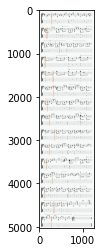

In [19]:
converted_images = [cv2.cvtColor(np.array(i), cv2.COLOR_RGB2BGR) for i in l]
shape = converted_images[0].shape
del converted_images[-3]
# vertically concatenate the images
final_image = cv2.vconcat(converted_images)
imshow(final_image)
cv2.imwrite("screencap.png", final_image)
# code to save the images as a series of aproximately paper sized images, as opposed to one long image

# group converted images into groups of 7
# converted_images_grouped = [converted_images[i:i+5] for i in range(0, len(converted_images), 5)]
# final_images = [cv2.vconcat(g) for g in converted_images_grouped]
# for i in range(len(final_images)):
#   cv2.imwrite("page{}.png".format(i), final_images[i])